<a href="https://colab.research.google.com/github/TheCameronJones/23SummitDeepDive/blob/main/Summit2023DeepDive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
sheet_id = "1GY99iC1dWVdMKBqWc-7tEyfcs4JwBLWTCICWJVBO4Ps"
worksheet_name='Sheet1'

In [ ]:
sh = gc.open_by_key(sheet_id)

In [ ]:
worksheet = sh.worksheet(worksheet_name)

In [ ]:
df = pd.DataFrame(worksheet.get_all_records())

In [ ]:
df.head()


,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,Raw Difference,Difference,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code
0,L1 - U16,Finals,1,Jessie Leigh Dance & Cheer Academy,Roar (England),136.3333,,0.0,97.3810,97.3810,,,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A
1,L1 - U16,Finals,2,Unity Allstars,Lemon (England),134.0667,,0.0,95.7619,95.7619,2.2666,1.6191,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A
2,L1 - U16,Finals,3,Wildcats Cheerleader Leverkusen,Wildcats J1 (Germany),132.6333,,0.0,94.7381,94.7381,1.4334,1.0238,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A
3,L1 - U16,Finals,4,Storm Athletics,Hail (England),130.9667,,0.0,93.5476,93.5476,1.6666,1.1905,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A
4,L1 - U16,Finals,4,University Cheer Force,Hail,129.8333,,0.0,92.7381,92.7381,1.1334,0.8095,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,


In [ ]:
df['Points In Play Earned'] = df['Points In Play Earned'].replace('',0).astype('float')

In [ ]:
df.describe(include='all')

,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,Raw Difference,Difference,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code
count,1667,1667,1667.000000,1667,1667,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667,1667,1667,1667.000000,1667,1667,1667,1667,1667,1667
unique,60,3,NaN,320,873,NaN,NaN,NaN,NaN,NaN,140,415,3,NaN,6,6,3,163,2,73
top,L2 Junior - Medium,Semi-Finals,NaN,The Stingray All Stars - Marietta,Steel,NaN,NaN,NaN,NaN,NaN,,,,NaN,Junior,Small,Finalist,Semi-Finals - L2 Junior - Medium,USASF,
freq,82,731,NaN,28,11,NaN,NaN,NaN,NaN,NaN,163,163,1106,NaN,767,889,562,32,1370,991
mean,NaN,NaN,8.351530,NaN,NaN,62.562108,6.852230,0.662867,93.929413,93.929413,NaN,NaN,NaN,3.097181,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.503208,NaN,NaN,33.302949,3.312093,1.720393,4.152364,4.152364,NaN,NaN,NaN,1.302287,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,41.033300,0.000000,0.000000,63.555600,63.555600,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.000000,NaN,NaN,46.900000,6.966700,0.000000,92.821400,92.821400,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7.000000,NaN,NaN,47.900000,8.200000,0.000000,94.983300,94.983300,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,12.000000,NaN,NaN,48.800000,8.933300,0.750000,96.488750,96.488750,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_usasf = df.loc[df['USASF/IASF']== 'USASF']


In [ ]:
import scipy as sp
from scipy.stats import zscore

In [ ]:
df['ZofPIPE'] =  df.groupby(['Round Division'])['Points In Play Earned'].transform(zscore)

In [ ]:
df

,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,...,Difference,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code,ZofPIPE
0,L1 - U16,Finals,1,Jessie Leigh Dance & Cheer Academy,Roar (England),136.3333,0.0000,0.00,97.3810,97.3810,...,,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A,NaN
1,L1 - U16,Finals,2,Unity Allstars,Lemon (England),134.0667,0.0000,0.00,95.7619,95.7619,...,1.6191,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A,NaN
2,L1 - U16,Finals,3,Wildcats Cheerleader Leverkusen,Wildcats J1 (Germany),132.6333,0.0000,0.00,94.7381,94.7381,...,1.0238,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A,NaN
3,L1 - U16,Finals,4,Storm Athletics,Hail (England),130.9667,0.0000,0.00,93.5476,93.5476,...,1.1905,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,#N/A,NaN
4,L1 - U16,Finals,4,University Cheer Force,Hail,129.8333,0.0000,0.00,92.7381,92.7381,...,0.8095,,1.0,U16,International,Finalist,Finals - L1 - U16,IASF,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,L6 Junior Coed - Small,Finals,4,Woodlands Elite - OR,Colonels,47.3000,7.9000,1.50,93.1000,93.1000,...,3.1667,,6.0,Junior,Small,Finalist,Finals - L6 Junior Coed - Small,USASF,77385,-1.621659
1663,L6 Junior Coed - Small,Semi-Finals,1,The Stingray All Stars - Marietta,Green,48.2333,8.8333,0.00,96.4667,96.4667,...,,X,6.0,Junior,Small,1,Semi-Finals - L6 Junior Coed - Small,USASF,77598,1.254912
1664,L6 Junior Coed - Small,Semi-Finals,2,Cheer Athletics - Plano,Savage6,47.5333,8.1333,1.25,93.8167,93.8167,...,2.65,X,6.0,Junior,Small,1,Semi-Finals - L6 Junior Coed - Small,USASF,75074,-0.062746
1665,L6 Junior Coed - Small,Semi-Finals,3,Woodlands Elite - OR,Colonels,46.9333,7.5333,3.00,90.8667,90.8667,...,2.95,X,6.0,Junior,Small,1,Semi-Finals - L6 Junior Coed - Small,USASF,77385,-1.192166


In [ ]:
df[df['ZofPIPE'] > 1.95]

,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,...,Difference,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code,ZofPIPE
218,L1 Senior - Small,Finals,1,Victory Vipers,Lady Strikers,45.1000,9.7000,0.00,98.0435,98.0435,...,,,1.0,Senior,Small,Finalist,Finals - L1 Senior - Small,USASF,18902,2.173646
363,L2 Junior - Medium,Wild Card,1,The Stingray All Stars - Marietta,Gray,49.3333,9.9333,0.00,98.6667,98.6667,...,,X,2.0,Junior,Medium,1,Wild Card - L2 Junior - Medium,USASF,77598,2.396201
410,L2 Junior - Small - A,Semi-Finals,1,California Pride,Eclipse,48.5000,9.1000,0.00,97.0000,97.0000,...,,X,2.0,Junior,Small,1,Semi-Finals - L2 Junior - Small - A,USASF,90063,2.054587
411,L2 Junior - Small - A,Semi-Finals,2,A-List Athletics,Bling,48.4333,9.0333,0.75,96.1167,96.1167,...,0.8833,X,2.0,Junior,Small,1,Semi-Finals - L2 Junior - Small - A,USASF,2886,1.958418
535,L2 Senior - Small,Finals,1,Woodlands Elite - Katy,Admirals,49.7000,10.3000,0.00,99.4000,99.4000,...,,,2.0,Senior,Small,Finalist,Finals - L2 Senior - Small,USASF,77494,2.027087
699,L3 Junior - Medium,Wild Card,1,KC Cheer,FIESTA,48.5667,9.1667,0.00,97.1333,97.1333,...,,X,3.0,Junior,Medium,1,Wild Card - L3 Junior - Medium,USASF,,1.985112
797,L3 Junior - Small - B,Semi-Finals,1,The California All Stars-San Marcos,J3,48.8000,9.4000,0.00,97.6000,97.6000,...,,X,3.0,Junior,Small,1,Semi-Finals - L3 Junior - Small - B,USASF,92069,2.021904
822,L3 Junior - Small - B,Wild Card,1,Stars Vipers San Antonio,V3nom,48.4333,9.0333,0.00,96.8667,96.8667,...,,X,3.0,Junior,Small,1,Wild Card - L3 Junior - Small - B,USASF,,2.249727
906,L3 Senior - Small,Wild Card,1,CheerForce San Diego,Frenzy,48.8667,9.4667,0.00,97.7333,97.7333,...,,X,3.0,Senior,Small,1,Wild Card - L3 Senior - Small,USASF,92020,1.987619
1057,L4 Junior - Medium,Finals,1,The California All Stars-Livermore,Covert,49.6667,10.2667,0.00,99.3333,99.3333,...,,,4.0,Junior,Medium,Finalist,Finals - L4 Junior - Medium,USASF,94551,2.601264


In [ ]:
df_usasf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 47 to 1666
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               1370 non-null   object 
 1   Round                  1370 non-null   object 
 2   Rank                   1370 non-null   int64  
 3   Program Name           1370 non-null   object 
 4   Team Name              1370 non-null   object 
 5   Raw Score              1370 non-null   float64
 6   Points In Play Earned  1370 non-null   float64
 7   Deductions             1370 non-null   float64
 8   Performance Score      1370 non-null   float64
 9   Event Score            1370 non-null   float64
 10  Raw Difference         1370 non-null   object 
 11  Difference             1370 non-null   object 
 12  Advance                1370 non-null   object 
 13  Level                  1370 non-null   float64
 14  Age                    1370 non-null   object 
 15  Siz

In [ ]:
df_usasf = df.loc[df['USASF/IASF']== 'USASF']


In [ ]:
df_usasf[df_usasf['ZofPIPE']>1.95].sort_values(by=['ZofPIPE'], ascending = False)

,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,...,Difference,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code,ZofPIPE
1104,L4 Junior - Small - A,Semi-Finals,1,Rival Athletics,Revenge,49.4000,10.0000,0.00,98.8000,98.8000,...,,X,4.0,Junior,Small,1,Semi-Finals - L4 Junior - Small - A,USASF,84003,2.611669
1057,L4 Junior - Medium,Finals,1,The California All Stars-Livermore,Covert,49.6667,10.2667,0.00,99.3333,99.3333,...,,,4.0,Junior,Medium,Finalist,Finals - L4 Junior - Medium,USASF,94551,2.601264
1089,L4 Junior - Small - A,Finals,1,Rival Athletics,Revenge,49.9000,10.5000,0.00,99.8000,99.8000,...,,,4.0,Junior,Small,Finalist,Finals - L4 Junior - Small - A,USASF,84003,2.414330
363,L2 Junior - Medium,Wild Card,1,The Stingray All Stars - Marietta,Gray,49.3333,9.9333,0.00,98.6667,98.6667,...,,X,2.0,Junior,Medium,1,Wild Card - L2 Junior - Medium,USASF,77598,2.396201
1068,L4 Junior - Medium,Semi-Finals,1,The California All Stars-Livermore,Covert,49.5333,10.1333,0.10,98.9667,98.9667,...,,X,4.0,Junior,Medium,1,Semi-Finals - L4 Junior - Medium,USASF,94551,2.256415
822,L3 Junior - Small - B,Wild Card,1,Stars Vipers San Antonio,V3nom,48.4333,9.0333,0.00,96.8667,96.8667,...,,X,3.0,Junior,Small,1,Wild Card - L3 Junior - Small - B,USASF,,2.249727
1154,L4 Junior - Small - B,Semi-Finals,1,California Pride,Lava,49.5667,10.1667,0.00,99.1333,99.1333,...,,X,4.0,Junior,Small,1,Semi-Finals - L4 Junior - Small - B,USASF,90063,2.230214
218,L1 Senior - Small,Finals,1,Victory Vipers,Lady Strikers,45.1000,9.7000,0.00,98.0435,98.0435,...,,,1.0,Senior,Small,Finalist,Finals - L1 Senior - Small,USASF,18902,2.173646
1456,L5 Junior - Small,Finals,1,South Coast Cheer,Hush,49.2000,9.8000,0.00,98.4000,98.4000,...,,,5.0,Junior,Small,Finalist,Finals - L5 Junior - Small,USASF,92705,2.064461
1139,L4 Junior - Small - B,Finals,1,California Pride,Lava,49.8667,10.4667,0.00,99.7333,99.7333,...,,,4.0,Junior,Small,Finalist,Finals - L4 Junior - Small - B,USASF,90063,2.058474


In [ ]:
df_usasf.sort_values(by=['Event Score'], ascending = False).head(17)

,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,...,Difference,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code,ZofPIPE
1089,L4 Junior - Small - A,Finals,1,Rival Athletics,Revenge,49.9000,10.5000,0.0,99.8000,99.8000,...,,,4.0,Junior,Small,Finalist,Finals - L4 Junior - Small - A,USASF,84003,2.414330
1139,L4 Junior - Small - B,Finals,1,California Pride,Lava,49.8667,10.4667,0.0,99.7333,99.7333,...,,,4.0,Junior,Small,Finalist,Finals - L4 Junior - Small - B,USASF,90063,2.058474
1522,L5 Senior - Small,Finals,1,GymTyme Illinois,GymTyme Illinois Twirl,49.8000,10.4000,0.0,99.6000,99.6000,...,,,5.0,Senior,Small,Finalist,Finals - L5 Senior - Small,USASF,60441,1.468714
535,L2 Senior - Small,Finals,1,Woodlands Elite - Katy,Admirals,49.7000,10.3000,0.0,99.4000,99.4000,...,,,2.0,Senior,Small,Finalist,Finals - L2 Senior - Small,USASF,77494,2.027087
312,L2 Junior - Medium,Finals,1,Cheer Express Allstars,Red Reign,49.6667,10.2667,0.0,99.3333,99.3333,...,,,2.0,Junior,Medium,Finalist,Finals - L2 Junior - Medium,USASF,34677,1.411736
1323,L4 Senior Open Coed,Finals,1,ICE - Naperville,Halo,49.6667,10.2667,0.0,99.3333,99.3333,...,,,4.0,Open,Open,Finalist,Finals - L4 Senior Open Coed,USASF,60563,1.371136
1057,L4 Junior - Medium,Finals,1,The California All Stars-Livermore,Covert,49.6667,10.2667,0.0,99.3333,99.3333,...,,,4.0,Junior,Medium,Finalist,Finals - L4 Junior - Medium,USASF,94551,2.601264
1536,L5 Senior - Small,Semi-Finals,1,GymTyme Illinois,GymTyme Illinois Twirl,49.6000,10.2000,0.0,99.2000,99.2000,...,,X,5.0,Senior,Small,1,Semi-Finals - L5 Senior - Small,USASF,60441,1.790667
1154,L4 Junior - Small - B,Semi-Finals,1,California Pride,Lava,49.5667,10.1667,0.0,99.1333,99.1333,...,,X,4.0,Junior,Small,1,Semi-Finals - L4 Junior - Small - B,USASF,90063,2.230214
313,L2 Junior - Medium,Finals,2,The California All Stars-San Marcos,Reign,49.5333,10.1333,0.0,99.0667,99.0667,...,0.2666,,2.0,Junior,Medium,Finalist,Finals - L2 Junior - Medium,USASF,92069,1.172667


In [ ]:
df['ZoES'] =  df.groupby(['Round Division'])['Event Score'].transform(zscore)

In [ ]:
df.sort_values(by=['ZoES'], ascending=False  ).head(20)

,Division,Round,Rank,Program Name,Team Name,Raw Score,Points In Play Earned,Deductions,Performance Score,Event Score,...,Advance,Level,Age,Size,Moving On,Round Division,USASF/IASF,Zip Code,ZofPIPE,ZoES
218,L1 Senior - Small,Finals,1,Victory Vipers,Lady Strikers,45.1000,9.7000,0.0,98.0435,98.0435,...,,1.0,Senior,Small,Finalist,Finals - L1 Senior - Small,USASF,18902,2.173646,2.679610
1104,L4 Junior - Small - A,Semi-Finals,1,Rival Athletics,Revenge,49.4000,10.0000,0.0,98.8000,98.8000,...,X,4.0,Junior,Small,1,Semi-Finals - L4 Junior - Small - A,USASF,84003,2.611669,2.469620
1068,L4 Junior - Medium,Semi-Finals,1,The California All Stars-Livermore,Covert,49.5333,10.1333,0.1,98.9667,98.9667,...,X,4.0,Junior,Medium,1,Semi-Finals - L4 Junior - Medium,USASF,94551,2.256415,2.205817
1139,L4 Junior - Small - B,Finals,1,California Pride,Lava,49.8667,10.4667,0.0,99.7333,99.7333,...,,4.0,Junior,Small,Finalist,Finals - L4 Junior - Small - B,USASF,90063,2.058474,2.143667
363,L2 Junior - Medium,Wild Card,1,The Stingray All Stars - Marietta,Gray,49.3333,9.9333,0.0,98.6667,98.6667,...,X,2.0,Junior,Medium,1,Wild Card - L2 Junior - Medium,USASF,77598,2.396201,2.091561
1154,L4 Junior - Small - B,Semi-Finals,1,California Pride,Lava,49.5667,10.1667,0.0,99.1333,99.1333,...,X,4.0,Junior,Small,1,Semi-Finals - L4 Junior - Small - B,USASF,90063,2.230214,2.081560
410,L2 Junior - Small - A,Semi-Finals,1,California Pride,Eclipse,48.5000,9.1000,0.0,97.0000,97.0000,...,X,2.0,Junior,Small,1,Semi-Finals - L2 Junior - Small - A,USASF,90063,2.054587,2.077623
535,L2 Senior - Small,Finals,1,Woodlands Elite - Katy,Admirals,49.7000,10.3000,0.0,99.4000,99.4000,...,,2.0,Senior,Small,Finalist,Finals - L2 Senior - Small,USASF,77494,2.027087,2.026680
822,L3 Junior - Small - B,Wild Card,1,Stars Vipers San Antonio,V3nom,48.4333,9.0333,0.0,96.8667,96.8667,...,X,3.0,Junior,Small,1,Wild Card - L3 Junior - Small - B,USASF,,2.249727,2.012606
1536,L5 Senior - Small,Semi-Finals,1,GymTyme Illinois,GymTyme Illinois Twirl,49.6000,10.2000,0.0,99.2000,99.2000,...,X,5.0,Senior,Small,1,Semi-Finals - L5 Senior - Small,USASF,60441,1.790667,1.957045


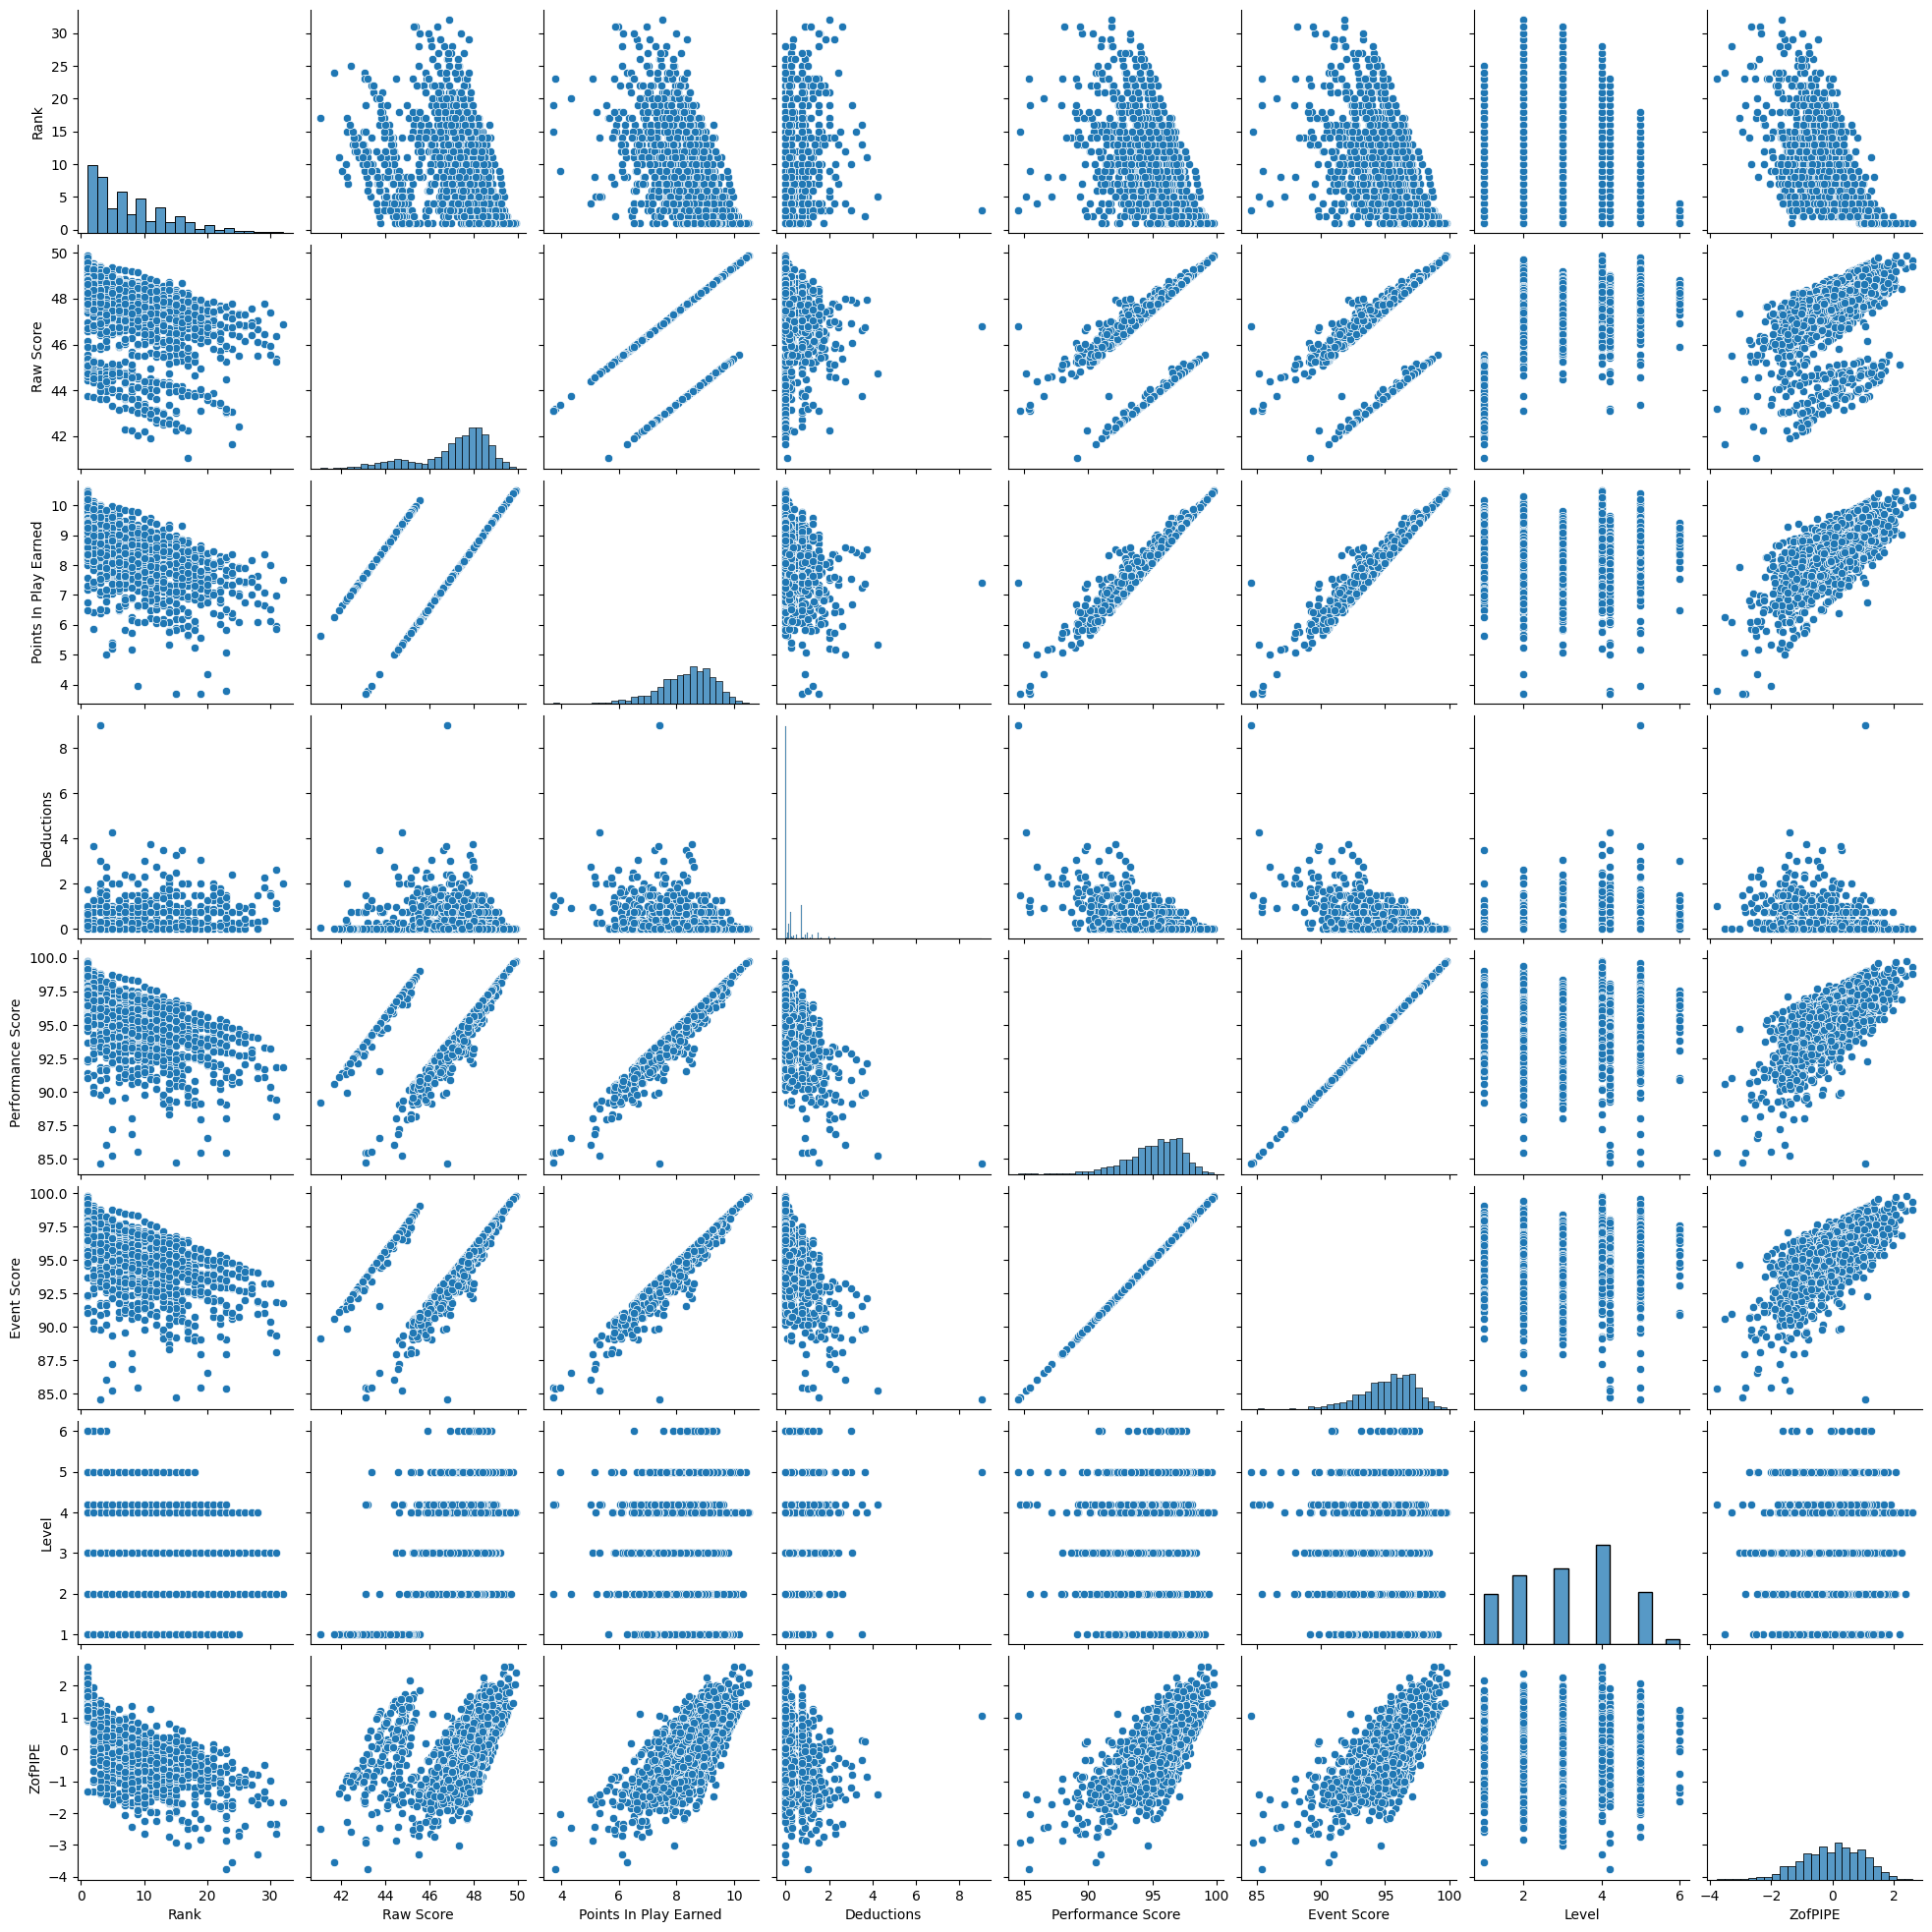

In [ ]:
sns.pairplot(df_usasf)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               1667 non-null   object 
 1   Round                  1667 non-null   object 
 2   Rank                   1667 non-null   int64  
 3   Program Name           1667 non-null   object 
 4   Team Name              1667 non-null   object 
 5   Raw Score              1667 non-null   float64
 6   Points In Play Earned  1667 non-null   float64
 7   Deductions             1667 non-null   float64
 8   Performance Score      1667 non-null   float64
 9   Event Score            1667 non-null   float64
 10  Raw Difference         1667 non-null   object 
 11  Difference             1667 non-null   object 
 12  Advance                1667 non-null   object 
 13  Level                  1667 non-null   float64
 14  Age                    1667 non-null   object 
 15  Size

In [ ]:
df['Round'] = str(df['Round'])

In [ ]:
df_usasf[(df_usasf['Round'] == 'Semi-Finals') & (df_usasf['Round Division'].count() > 20) ].loc[:,['Round Division','Rank','Program Name','Team Name','Event Score','ZofPIPE']].sort_values(by='ZofPIPE', ascending = False).head(20)

,Round Division,Rank,Program Name,Team Name,Event Score,ZofPIPE
1104,Semi-Finals - L4 Junior - Small - A,1,Rival Athletics,Revenge,98.8000,2.611669
1068,Semi-Finals - L4 Junior - Medium,1,The California All Stars-Livermore,Covert,98.9667,2.256415
1154,Semi-Finals - L4 Junior - Small - B,1,California Pride,Lava,99.1333,2.230214
410,Semi-Finals - L2 Junior - Small - A,1,California Pride,Eclipse,97.0000,2.054587
797,Semi-Finals - L3 Junior - Small - B,1,The California All Stars-San Marcos,J3,97.6000,2.021904
411,Semi-Finals - L2 Junior - Small - A,2,A-List Athletics,Bling,96.1167,1.958418
1276,Semi-Finals - L4 Senior Coed - Medium,1,Top Gun All Stars - Orlando,24k,98.6000,1.875907
331,Semi-Finals - L2 Junior - Medium,1,Cheer Express Allstars,Red Reign,99.0000,1.860414
938,Semi-Finals - L3 Senior Coed - Small,1,Cheer Express Allstars,Bomb Squad,96.9333,1.837922
1536,Semi-Finals - L5 Senior - Small,1,GymTyme Illinois,GymTyme Illinois Twirl,99.2000,1.790667


In [ ]:
df_usasf[(df_usasf['Round'] == 'Semi-Finals') & (df_usasf['Round Division'].count() > 20) ].loc[:,['Round Division','Rank','Program Name','Team Name','Event Score','ZofPIPE']].sort_values(by='Event Score', ascending = False).head(20)

,Round Division,Rank,Program Name,Team Name,Event Score,ZofPIPE
1536,Semi-Finals - L5 Senior - Small,1,GymTyme Illinois,GymTyme Illinois Twirl,99.2000,1.790667
1154,Semi-Finals - L4 Junior - Small - B,1,California Pride,Lava,99.1333,2.230214
331,Semi-Finals - L2 Junior - Medium,1,Cheer Express Allstars,Red Reign,99.0000,1.860414
1068,Semi-Finals - L4 Junior - Medium,1,The California All Stars-Livermore,Covert,98.9667,2.256415
1104,Semi-Finals - L4 Junior - Small - A,1,Rival Athletics,Revenge,98.8000,2.611669
207,Semi-Finals - L1 Senior - Medium,1,California Pride,Inferno,98.6232,1.136641
1276,Semi-Finals - L4 Senior Coed - Medium,1,Top Gun All Stars - Orlando,24k,98.6000,1.875907
549,Semi-Finals - L2 Senior - Small,1,Woodlands Elite - Katy,Admirals,98.4667,1.698612
208,Semi-Finals - L1 Senior - Medium,2,The California All Stars-San Marcos,White Gold,98.4058,0.914868
1228,Semi-Finals - L4 Senior - Small,1,South Coast Cheer,Scarlet,98.3333,1.390661


In [ ]:
df.rename(columns={'Event Score':'Event_Score','Round Division':'Round_Division'}, inplace=True)

In [ ]:
from statsmodels.formula.api import ols

model = ols(formula = "Event_Score ~ C(Round_Division)", data = df_usasf).fit()

anova_result = sm.stats.anova_lm(model,typ=2)

print(anova_result)

                        sum_sq      df         F        PR(>F)
C(Round_Division)  2576.691750   136.0  5.447983  3.118395e-61
Residual           4287.961833  1233.0       NaN           NaN


In [ ]:
large = df_usasf.groupby('Round_Division').filter(lambda x: len(x)> 20)

large



,Division,Round,Rank,Program Name,Team Name,Raw Score,PIPE,Deductions,Performance Score,Event_Score,...,Difference,Advance,Level,Age,Size,Moving On,Round_Division,USASF/IASF,Zip Code,ZofPIPE
101,L1 Junior - Small - A,Semi-Finals,1,The Stingray All Stars - Marietta,Mango,45.0333,9.6333,0.00,97.8986,97.8986,...,,X,1.0,Junior,Small,1,Semi-Finals - L1 Junior - Small - A,USASF,77598,1.334655
102,L1 Junior - Small - A,Semi-Finals,2,Star Athletics,Junior Chrome,44.9333,9.5333,0.00,97.6812,97.6812,...,0.2174,X,1.0,Junior,Small,1,Semi-Finals - L1 Junior - Small - A,USASF,7005,1.183442
103,L1 Junior - Small - A,Semi-Finals,3,ACX,WILD JAGS,44.9000,9.5000,0.00,97.6087,97.6087,...,0.0725,X,1.0,Junior,Small,1,Semi-Finals - L1 Junior - Small - A,USASF,,1.133088
104,L1 Junior - Small - A,Semi-Finals,4,The Stingray All Stars - Tampa,Wave,44.8667,9.4667,0.00,97.5362,97.5362,...,0.0725,X,1.0,Junior,Small,1,Semi-Finals - L1 Junior - Small - A,USASF,,1.082734
105,L1 Junior - Small - A,Semi-Finals,5,Rival Athletics,inf,44.8333,9.4333,0.00,97.4638,97.4638,...,0.0724,X,1.0,Junior,Small,1,Semi-Finals - L1 Junior - Small - A,USASF,84003,1.032229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,L4.2 Senior - Small,Semi-Finals,19,South Jersey Storm,Perfect 4.ca2t,47.2000,7.8000,0.75,93.6500,93.6500,...,0.2,,4.2,Senior,Small,0,Semi-Finals - L4.2 Senior - Small,USASF,,-0.216503
1392,L4.2 Senior - Small,Semi-Finals,20,US Cheer Rebels,Rowdy Rebels,46.7333,7.3333,0.00,93.4667,93.4667,...,0.1833,,4.2,Senior,Small,0,Semi-Finals - L4.2 Senior - Small,USASF,,-0.631519
1393,L4.2 Senior - Small,Semi-Finals,21,Fusion All Stars,SPICE GIRLS,47.4333,8.0333,1.85,93.0167,93.0167,...,0.45,,4.2,Senior,Small,0,Semi-Finals - L4.2 Senior - Small,USASF,,-0.009039
1394,L4.2 Senior - Small,Semi-Finals,22,East Celebrity Elite Manchester,Divas,45.4333,6.0333,1.60,89.2667,89.2667,...,3.75,,4.2,Senior,Small,0,Semi-Finals - L4.2 Senior - Small,USASF,6042,-1.787551


In [ ]:
large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 101 to 1395
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               359 non-null    object 
 1   Round                  359 non-null    object 
 2   Rank                   359 non-null    int64  
 3   Program Name           359 non-null    object 
 4   Team Name              359 non-null    object 
 5   Raw Score              359 non-null    float64
 6   Points In Play Earned  359 non-null    float64
 7   Deductions             359 non-null    float64
 8   Performance Score      359 non-null    float64
 9   Event_Score            359 non-null    float64
 10  Raw Difference         359 non-null    object 
 11  Difference             359 non-null    object 
 12  Advance                359 non-null    object 
 13  Level                  359 non-null    float64
 14  Age                    359 non-null    object 
 15  Siz

In [ ]:
model = ols(formula = "Event_Score ~ C(Round_Division)", data = large).fit()

anova_result = sm.stats.anova_lm(model,typ=2)

print(anova_result)

                        sum_sq     df        F        PR(>F)
C(Round_Division)   256.077903   13.0  5.93474  5.925781e-10
Residual           1145.107252  345.0      NaN           NaN


In [ ]:
large['Round_Division'].unique()

array(['Semi-Finals - L1 Junior - Small - A',
       'Semi-Finals - L1 Junior - Small - B',
       'Semi-Finals - L2 Junior - Medium',
       'Wild Card - L2 Junior - Medium',
       'Semi-Finals - L2 Junior - Small - A',
       'Semi-Finals - L2 Junior - Small - B',
       'Semi-Finals - L3 Junior - Medium',
       'Semi-Finals - L3 Junior - Small - A',
       'Wild Card - L3 Junior - Small - A',
       'Semi-Finals - L3 Junior - Small - B',
       'Wild Card - L3 Junior - Small - B',
       'Semi-Finals - L4 Junior - Small - B',
       'Semi-Finals - L4 Senior - Small',
       'Semi-Finals - L4.2 Senior - Small'], dtype=object)

In [ ]:
df.rename(columns={'Points In Play Earned':'PIPE'}, inplace=True)

In [ ]:
df_usasf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 47 to 1666
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Division           1370 non-null   object 
 1   Round              1370 non-null   object 
 2   Rank               1370 non-null   int64  
 3   Program Name       1370 non-null   object 
 4   Team Name          1370 non-null   object 
 5   Raw Score          1370 non-null   float64
 6   PIPE               1370 non-null   float64
 7   Deductions         1370 non-null   float64
 8   Performance Score  1370 non-null   float64
 9   Event_Score        1370 non-null   float64
 10  Raw Difference     1370 non-null   object 
 11  Difference         1370 non-null   object 
 12  Advance            1370 non-null   object 
 13  Level              1370 non-null   float64
 14  Age                1370 non-null   object 
 15  Size               1370 non-null   object 
 16  Moving On          1370

In [ ]:
model = ols(formula = "PIPE ~ C(Round_Division)", data = large).fit()

anova_result = sm.stats.anova_lm(model,typ=2)

print(anova_result)

                       sum_sq     df         F        PR(>F)
C(Round_Division)   64.703015   13.0  8.124424  2.887748e-14
Residual           211.352635  345.0       NaN           NaN
